In [122]:
import pandas as pd

df = pd.read_csv('steam-200k.csv')

df.head()

,player_id,game_title,type,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [123]:
df.shape

(200000, 4)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   player_id   200000 non-null  int64  
 1   game_title  200000 non-null  object 
 2   type        200000 non-null  object 
 3   hours       200000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


no null values

In [125]:
df.describe()

,player_id,hours
count,2.000000e+05,200000.000000
mean,1.036559e+08,17.874384
std,7.208074e+07,138.056952
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


In [126]:
#Removing 'purchase' in type column because it's not relevent.
df = df[df['type'] != 'purchase']
df.head()

,player_id,game_title,type,hours
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [127]:
df.drop('type', axis=1, inplace=True)
df.rename(columns={'hours': 'Hours_Played'}, inplace=True)
df.head()

,player_id,game_title,Hours_Played
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9


In [128]:
df.duplicated().sum()

0

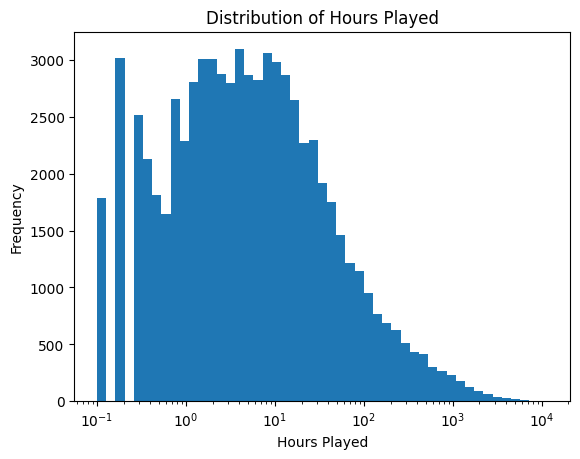

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Logarithmic binning
bins = np.logspace(np.log10(df['Hours_Played'].min()), np.log10(df['Hours_Played'].max()), 50)

plt.hist(df['Hours_Played'], bins=bins)
plt.xscale('log')
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Played')
plt.show()


In [130]:
df.describe()

,player_id,Hours_Played
count,7.048900e+04,70489.000000
mean,1.058812e+08,48.878063
std,7.150365e+07,229.335236
min,5.250000e+03,0.100000
25%,4.934256e+07,1.000000
50%,9.169067e+07,4.500000
75%,1.556738e+08,19.100000
max,3.099031e+08,11754.000000


In [131]:
!pip install category_encoders

There are no duplicates

In [132]:
import category_encoders as ce

# 'game_title' is categorical. needs encoding
encoder = ce.TargetEncoder(cols=['game_title'])
df['title_encoded'] = encoder.fit_transform(df['game_title'], df['Hours_Played'])
df.head()

,player_id,game_title,Hours_Played,title_encoded
1,151603712,The Elder Scrolls V Skyrim,273.0,104.710931
3,151603712,Fallout 4,87.0,64.447898
5,151603712,Spore,14.9,29.849815
7,151603712,Fallout New Vegas,12.1,51.682578
9,151603712,Left 4 Dead 2,8.9,41.943446


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Split the data into features and target variable
X = df[['player_id', 'title_encoded']]
y = df['Hours_Played']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([  9.16600703,  39.05341604,  30.10463101, ..., 155.76061802,
        77.12897351,  12.10717295])

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 52327.119122106786
R-squared: 0.0833920969995936


In [135]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.10054541 0.08626682 0.09480841 0.07693536 0.08083642]
Average Cross-Validation Score: 0.08787848397160894


Very low accuracy score